<a href="https://colab.research.google.com/github/olatundeopeyemi0001/HamoyeDS_internship/blob/master/Hamoye_stage1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuel Quality Dataset
**Introduction** <br>

Electric Utilities report a huge amount of information to government and public agencies. They include very granular data on fuel burned, electricity generated, power plant usage patterns, plant capacity factors and emissions from greenhouse gases. However, this data is not well documented and sometimes they are provided in a format that makes it difficult to understand.

In [4]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
%matplotlib inline
from scipy import stats
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
from google.colab import files
uploaded = files.upload()

Saving fuel_ferc1.csv to fuel_ferc1.csv


In [8]:

#Read dataset into dataframe
fuel_qlty = pd.read_csv('fuel_ferc1.csv')

fuel_qlty = fuel quality

In [9]:
fuel_qlty.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.77,2.570


In [ ]:
print('features of the fuel quality dataset',fuel_qlty.columns)

All features of the fuel quality dataset Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')


In [ ]:
print('Data file dimension: ', fuel_qlty.shape)

Data file dimension:  (29523, 11)


In [ ]:
print(fuel_qlty.shape)

(29523, 11)


In [ ]:
#To check if there is any row duplicated

print(fuel_qlty.duplicated().any())

False


In [ ]:
#Or using inline comment within inverted commas
print('any rows duplicated? ',fuel_qlty.duplicated().any())

any rows duplicated?  False


In [ ]:
#To get the Summary statistics of the numerical features
fuel_qlty.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523.000000,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
mean,118.601836,2005.806050,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,74.178353,7.025483,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,1.000000,1994.000000,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,55.000000,2000.000000,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,122.000000,2006.000000,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,176.000000,2012.000000,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000
max,514.000000,2018.000000,5.558942e+08,341.260000,139358.000000,7.964521e+06,359278.000000


In [ ]:
outlier_features = fuel_qlty.select_dtypes(include=[np.number])
outlier_features.head()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,1,1994,5377489,16.590,18.59,18.53,1.121
1,1,1994,10486945,16.592,18.58,18.53,1.120
2,2,1994,2978683,24.130,39.72,38.12,1.650
3,2,1994,3739484,23.950,47.21,45.99,1.970
4,2,1994,40533,1.000,2.77,2.77,2.570


In [ ]:
outlier_features.columns


Index(['utility_id_ferc1', 'report_year', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

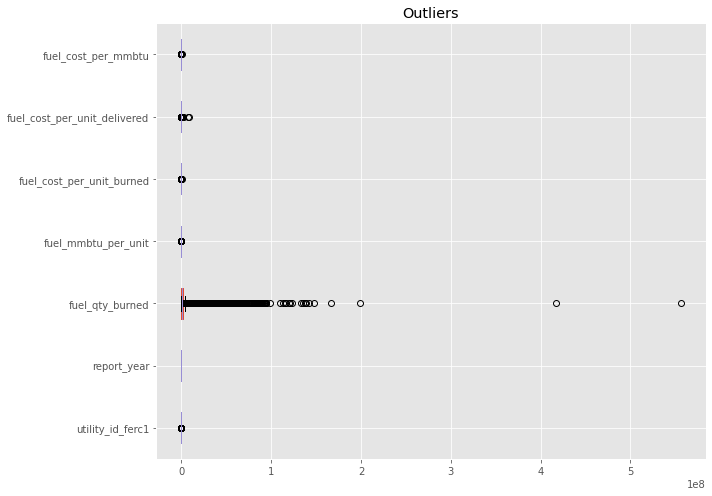

In [ ]:
outlier_features.plot(kind = 'box', vert = False, figsize = (10, 7))
plt.title('Outliers')
plt.tight_layout()

In [ ]:
#Summary stats of elements 
fuel_qlty.describe(include = 'object')

,record_id,plant_name_ferc1,fuel_type_code_pudl,fuel_unit
count,29523,29523,29523,29343
unique,29523,2315,6,9
top,f1_fuel_2007_12_100_0_1,big stone,gas,mcf
freq,1,156,11486,11354


In [ ]:
#Data information and data types
fuel_qlty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  int64  
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 2.5+ MB


AND WE PROCEED....

In [ ]:
#Checking the percentage of the missing values and sort them
missing_value = (fuel_qlty.isnull().sum()) / len(fuel_qlty) * 100 #Multplied by 100percent
missing_value.sort_values(ascending= False)

fuel_unit                       0.609694
fuel_cost_per_mmbtu             0.000000
fuel_cost_per_unit_delivered    0.000000
fuel_cost_per_unit_burned       0.000000
fuel_mmbtu_per_unit             0.000000
fuel_qty_burned                 0.000000
fuel_type_code_pudl             0.000000
plant_name_ferc1                0.000000
report_year                     0.000000
utility_id_ferc1                0.000000
record_id                       0.000000
dtype: float64

In [ ]:
#For missing cell values
fuel_qlty.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

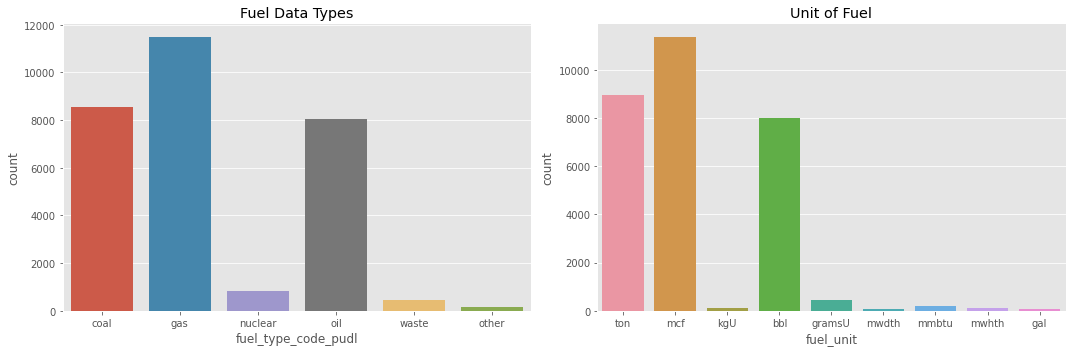

In [10]:
#To plot an histogram of some of the elements of the fuel type
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.countplot(fuel_qlty['fuel_type_code_pudl'], ax = ax[0])
sns.countplot(fuel_qlty['fuel_unit'], ax = ax[1])
ax[0].title.set_text('Fuel Data Types')
ax[1].title.set_text('Unit of Fuel')
plt.tight_layout() 

Text(0.5, 1.0, 'Distribution of The Plant Names')

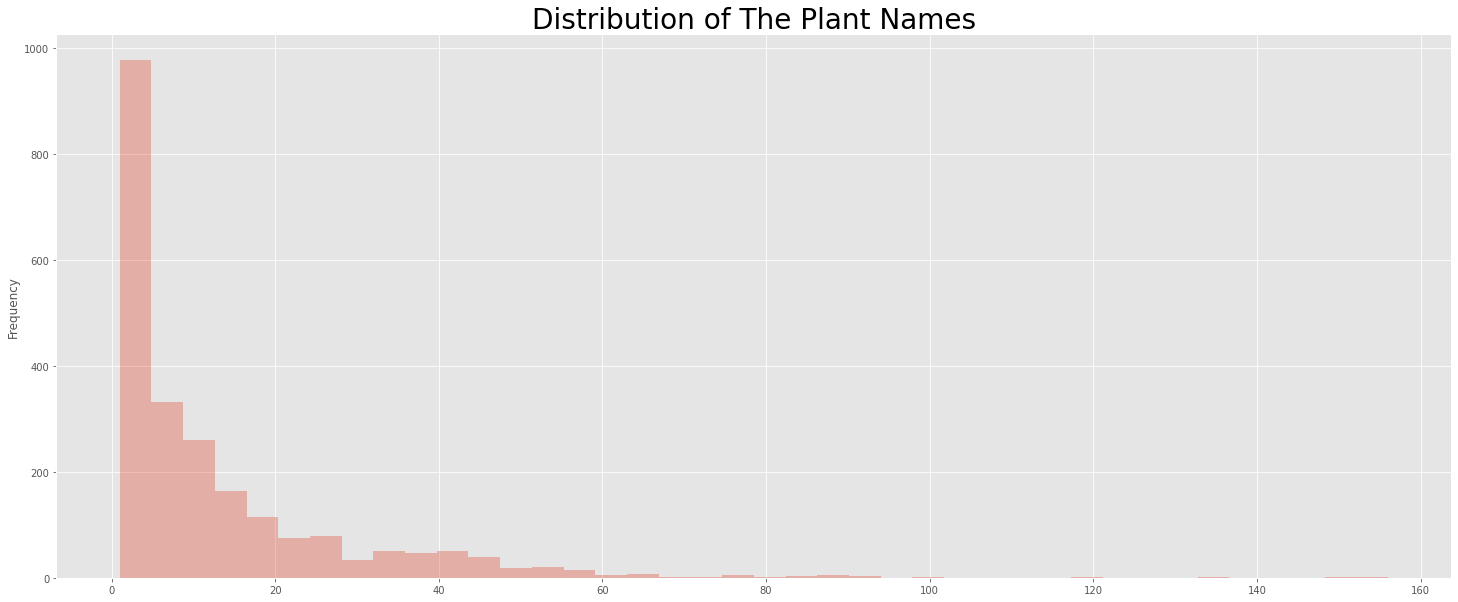

In [ ]:
fuel_qlty.plant_name_ferc1.value_counts().plot(kind = 'hist', figsize = (25,10), bins = 40, alpha = 0.35)
plt.title('Distribution of The Plant Names', fontsize = 28)

In [ ]:
#To check for skewness of fuel_quantity burned
stats.skew(fuel_qlty.fuel_qty_burned)

15.850690077422112

In [ ]:
#For the kurtosis of fuel quantity burned
stats.kurtosis(fuel_qlty.fuel_qty_burned)

651.2589365474387

In [ ]:
#filling up of the missing data
stats.mode(fuel_qlty.fuel_unit)

ModeResult(mode=array(['mcf'], dtype=object), count=array([11354]))

In [ ]:
fuel_qlty.fuel_unit.fillna('mcf', inplace=True)

In [ ]:
#Reassement for missing data
fuel_qlty.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

NO MISSING CELL VALUE FOUND . UNTO THE NEXT ONE

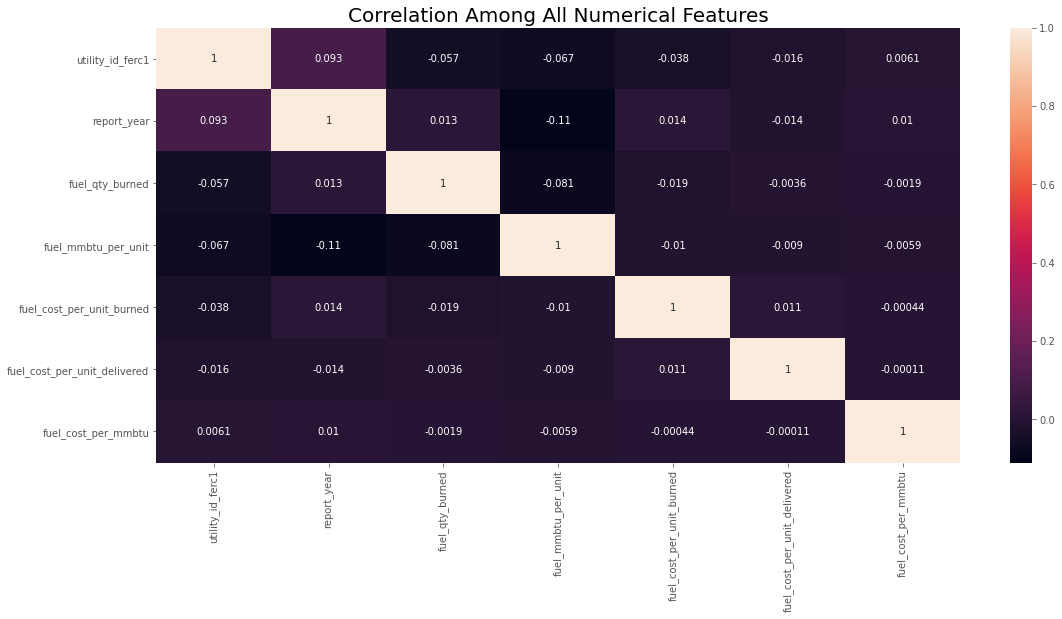

In [11]:
#Features correlation
f, ax = plt.subplots(figsize = (18,8))
plt.title('Correlation Among All Numerical Features', fontsize = 20)
sns.heatmap(fuel_qlty.corr(), annot = True)

In [12]:
#fuel cost per unit burned with correlating features
fuel_qlty_corr = fuel_qlty.corr()
fuel_qlty_corr = fuel_qlty_corr.fuel_cost_per_unit_burned.sort_values(ascending = False)
fuel_qlty_corr

fuel_cost_per_unit_burned       1.000000
report_year                     0.013599
fuel_cost_per_unit_delivered    0.011007
fuel_cost_per_mmbtu            -0.000437
fuel_mmbtu_per_unit            -0.010034
fuel_qty_burned                -0.018535
utility_id_ferc1               -0.037863
Name: fuel_cost_per_unit_burned, dtype: float64

In [13]:
#creating more features
fuel_qlty['total_cost_fuel_burned'] = fuel_qlty.fuel_qty_burned * fuel_qlty.fuel_cost_per_unit_burned
fuel_qlty['total_cost_mmbtu_fuel'] = fuel_qlty.fuel_mmbtu_per_unit * fuel_qlty.fuel_cost_per_mmbtu
fuel_qlty['percent_fuel_cost_per_unit_burned'] = fuel_qlty.fuel_cost_per_unit_burned.value_counts(normalize=True) * 100

In [14]:
fuel_qlty.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,total_cost_fuel_burned,total_cost_mmbtu_fuel,percent_fuel_cost_per_unit_burned
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,18.53,1.121,9.996752e+07,18.59739,0.975511
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945,16.592,18.58,18.53,1.120,1.948474e+08,18.58304,0.003387
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,38.12,1.650,1.183133e+08,39.81450,0.013549
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,45.99,1.970,1.765410e+08,47.18150,0.033872
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.77,2.570,1.122764e+05,2.57000,0.033872


In [15]:
groupby_year = fuel_qlty.groupby('report_year').sum().round(decimals = 2)
groupby_year

,utility_id_ferc1,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,total_cost_fuel_burned,total_cost_mmbtu_fuel,percent_fuel_cost_per_unit_burned
report_year,,,,,,,,,
1994,131059,3364162841,13138.05,263292.12,78590.53,3812.42,5.327818e+10,23787.96,1.45
1995,132277,4458192116,12784.44,425661.49,39315.06,3445.47,6.613160e+10,21007.28,0.00
1996,118281,2768692878,11726.51,86425.28,10006016.07,2933.12,2.588083e+10,20605.82,0.00
1997,118553,3077972763,11210.91,163533.45,12187375.78,3406.15,1.203283e+11,19764.35,0.01
1998,121599,3617070075,11850.39,140238.66,317879.94,3072.88,5.542562e+10,17321.63,0.00
1999,113634,3445344906,11086.83,126056.28,26829.21,2877.26,1.545287e+11,15824.33,0.00
2000,152518,3394100198,12665.20,326495.43,1352903.23,5778.14,3.450366e+11,28798.14,0.00
2001,153935,3147821459,11351.71,180365.64,81428.34,6254.76,1.598751e+11,30821.73,0.00
2002,145027,2585502144,10007.32,121921.13,57351.21,7502.67,2.797661e+10,25516.60,0.00


Text(0.5, 1.0, 'Fuel Cost Per Unit Burned Over the Years (fuelTypes)')

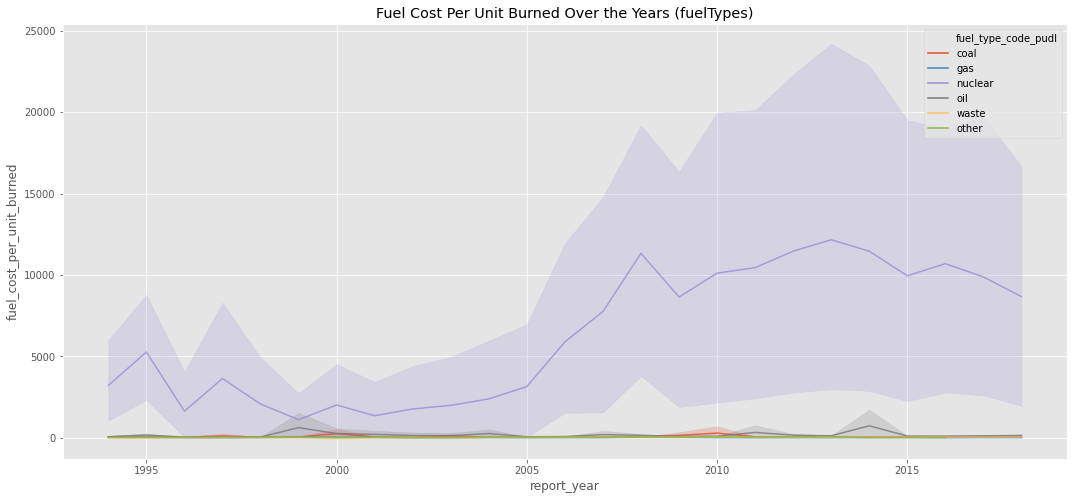

In [17]:
f, ax = plt.subplots(figsize = (18,8))
sns.lineplot(x = 'report_year', y = 'fuel_cost_per_unit_burned', hue = 'fuel_type_code_pudl',  data = fuel_qlty, alpha = 0.8)
plt.title('Fuel Cost Per Unit Burned Over the Years (fuelTypes)')